**Übung Mustererkennung** *WS 2022/23* -- *K. Brandenbusch,  Gernot A. Fink* -- *Technische Universität Dortmund, Lehrstuhl XII, Mustererkennung in eingebetteten Systemen*

___
# Aufgabe 5b: Hauptachsen-Transformation auf MNIST
Nachdem bisher mit artifiziellen Datensätzen gearbeitet wurde, wenden wir uns jetzt realen Daten zu.
Dazu verwenden wir den [MNIST-Datensatz](https://de.wikipedia.org/wiki/MNIST-Datenbank) der Grauwert-Bilder handgeschriebener Ziffern enthält.
Der MNIST-Datensatz besteht im Original aus 60000 Trainingsbildern und 10000 Testbildern.
Um den Trainingsaufwand gering zu halten, werden im Rahmen dieser Übung lediglich 1000 zufällig ausgewählte aus den ingesamt zur Verfügung stehenden 6000 Trainingsbeispielen pro Klasse verwendet.
Somit ergibt sich ein Trainingsdatensatz von 10000 sowie ein ebenfalls verkleinerter Testdatensatz von 1000 Bildern.
Die 28 × 28 Pixel großen Bilder können als 784-dimensionale Merkmalsvektoren aufgefasst werden.

Zuerst muss das Notebook konfiguriert werden.

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

# Uebergeordneten Ordner zum Pfad hinzufuegen, damit das common Package importiert werden kann
import sys
if '..' not in sys.path:
    sys.path.append('..')

import matplotlib.pyplot as plt  
import matplotlib.cm as cm
    
def show_data(data, width=1):
    """
    Stellt die Bilder in data zeilenweise dar. Nebeneinander werden width-viele
    Bilder angezeigt. Die Gesamtanzahl der Bilder muss so gewaehlt sein, dass in jeder
    Zeile width-viele Bilder dargestellt werden koennen.
    Params:
        data: Darzustellende Bilder als 2D-ndarray. Eine Zeile entspricht einem Bild.
        width: Anzahl der Bilder einer Zeile in der Visualisierung. (default = 1)
    """
    if len(data.shape) == 1:
        data = data.reshape(1, data.shape[0])
        image_count = 1
    else:
        image_count = data.shape[0]

    image = []
    for i in np.arange(width):
        index = np.arange(i, image_count, width)
        column = data[index, :]
        image.append(column.reshape((28 * column.shape[0], 28)))
    image = np.hstack(tuple(image))

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap=cm.get_cmap('Greys_r'))
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Laden Sie die Trainingsdaten des MNIST-Datensatz.
Das Laden des Datensatzes kann einige Sekunden in Anspruch nehmen.
Mit der oben definierten Funktion `show_data(data, width)` können Sie Bilder des Datensatzes anzeigen lassen.
Die Anzahl der Bilder muss ein Vielfaches des Parameters `width` sein.

<AxesSubplot: >

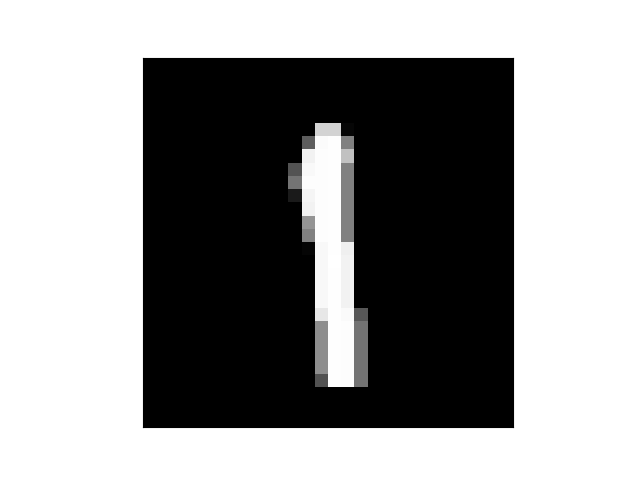

In [7]:
from common.data_provider import DataProvider
import numpy as np
train_data_provider = DataProvider(DataProvider.MNIST_TRAIN)
train_data, train_labels = train_data_provider.get_dataset_and_labels()
show_data(data=train_data[1999], width=1)


Schätzen Sie nun eine Hauptachsen-Tranformations für die 784-dimensionalen Daten des MNIST-Datensatzes.
Plotten Sie anschließend eine Kurve die den Rekonstruktionsfehler in Abhängigkeit zur gewälten Dimension zeigt.
Wählen Sie aufgrund ihrer Beobachtung geeignete Größen für Ihre Dimensionsreduktion.

In [8]:
from common.pca import PCA
pca_object = PCA(train_data)

for i in range(30):
    targetDim = 10 + i * 5
    (_, error) = pca_object.transform_samples(train_data, target_dim=targetDim)
    print(f"targetDim: {targetDim} --> error: {error}")

targetDim = 85 #90% varianz uebrig
(samples_dim_reduced, error) = pca_object.transform_samples(train_data, target_dim=targetDim)
    

targetDim: 10 --> error: (0.5083410893404084+0j)
targetDim: 15 --> error: (0.4166802660222071+0j)
targetDim: 20 --> error: (0.3523860874205614+0j)
targetDim: 25 --> error: (0.3042337735394393+0j)
targetDim: 30 --> error: (0.2659221391353338+0j)
targetDim: 35 --> error: (0.2354885216549617+0j)
targetDim: 40 --> error: (0.2106214634536599+0j)
targetDim: 45 --> error: (0.18986423044635228+0j)
targetDim: 50 --> error: (0.17266178950412717+0j)
targetDim: 55 --> error: (0.1575576838913253+0j)
targetDim: 60 --> error: (0.1446197185876864+0j)
targetDim: 65 --> error: (0.13328729066082406+0j)
targetDim: 70 --> error: (0.12341163688370003+0j)
targetDim: 75 --> error: (0.11473561526725462+0j)
targetDim: 80 --> error: (0.10712645059658077+0j)
targetDim: 85 --> error: (0.10028307999041564+0j)
targetDim: 90 --> error: (0.09407463879074285+0j)
targetDim: 95 --> error: (0.08848680018636076+0j)
targetDim: 100 --> error: (0.08341408266862188+0j)
targetDim: 105 --> error: (0.0788125352354941+0j)
targetDi

Visualisieren sie den Mittelwert des Datensatzes (siehe Konstruktor der Klasse `PCA`) und die ersten 20 Eigenvektoren.
Verwenden Sie dazu die Methode `show_data`.

shape of train mean: (784,)


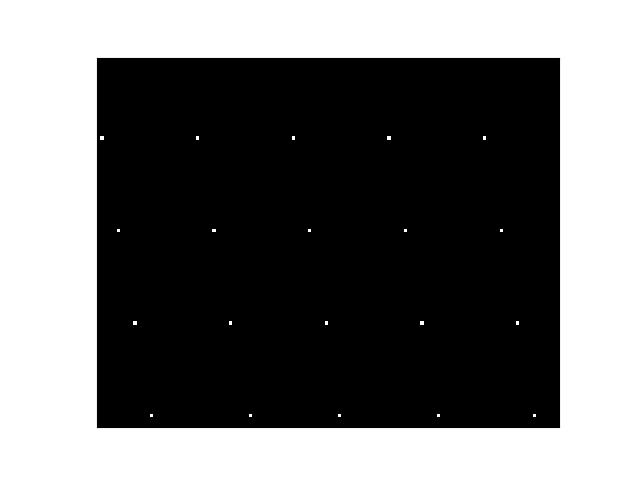

In [9]:
train_mean = np.mean(train_data, axis=0)
print(f"shape of train mean: {train_mean.shape}")
#show_data(train_mean, width=1)
eigenVecs = np.real(pca_object.eig_vecs)
show_data(eigenVecs[:20], width=5)
sumEigenVecs = np.sum(eigenVecs[:20])
#show_data(sumEigenVecs, width=1)

Transformieren Sie nun die Daten in die von Ihnen gewälten Dimensionen.
Führen sie außerdem anschließend eine Rücktransformation durch.
Legen Sie dafür eine Methode `retransform_samples` in der Klasse `PCA` an.

Visualisieren Sie für jede rücktransformierte Variante jede Ziffer (ähnlich wie zu Beginn der Aufgabe).
Nutzen Sie dafür die Methode `show_data`.

(10000, 85)
(85, 784)
(10000, 784)
(10000, 784)


<AxesSubplot: >

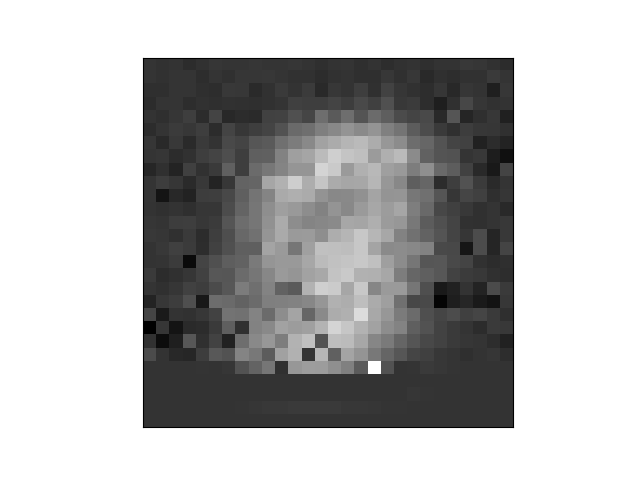

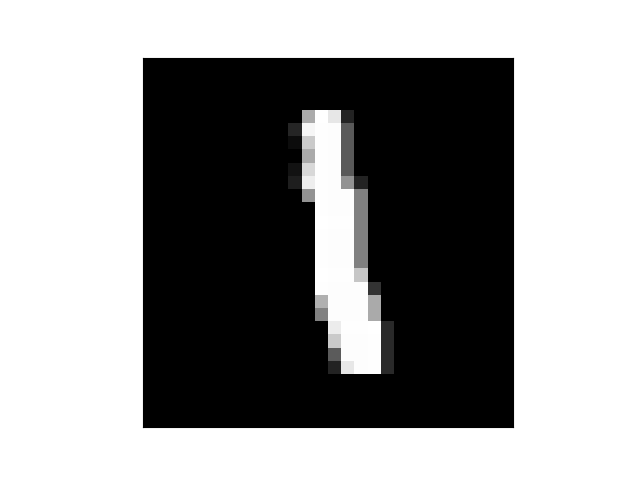

In [10]:
targetDim = 85 #90% varianz uebrig
(samples_dim_reduced, error) = pca_object.transform_samples(train_data, target_dim=targetDim)
#pca_object.
reconstructed = pca_object.retransform_samples(samples_dim_reduced)
print(reconstructed.shape)
print(train_data.shape)
show_data(reconstructed[1001])
show_data(train_data[1001])

Es ist empfehlenswert, die dimensionsreduzierten Daten für die spätere Nutzung zu speichern.  
Dazu bietet sich die Python Bibliothek [`pickle`](https://docs.python.org/3.9/library/pickle.html) an. 
Eine kurze Einführung in die Verwendung von `pickle` finden sie [hier](https://wiki.python.org/moin/UsingPickle).

_Hinweis_: Hinterlegen Sie die Dimension der dimensionsreduzierten Daten im Dateinamen des gespeicherten Objekts um in späteren Aufgaben mehrere Varianten zu Verfügung zu haben.